Delta-v: 4213.90 m/s
Final Altitude: 178.50 km
Required Orbital Velocity: 7801.15 m/s
Actual Achieved Velocity: 2885.13 m/s


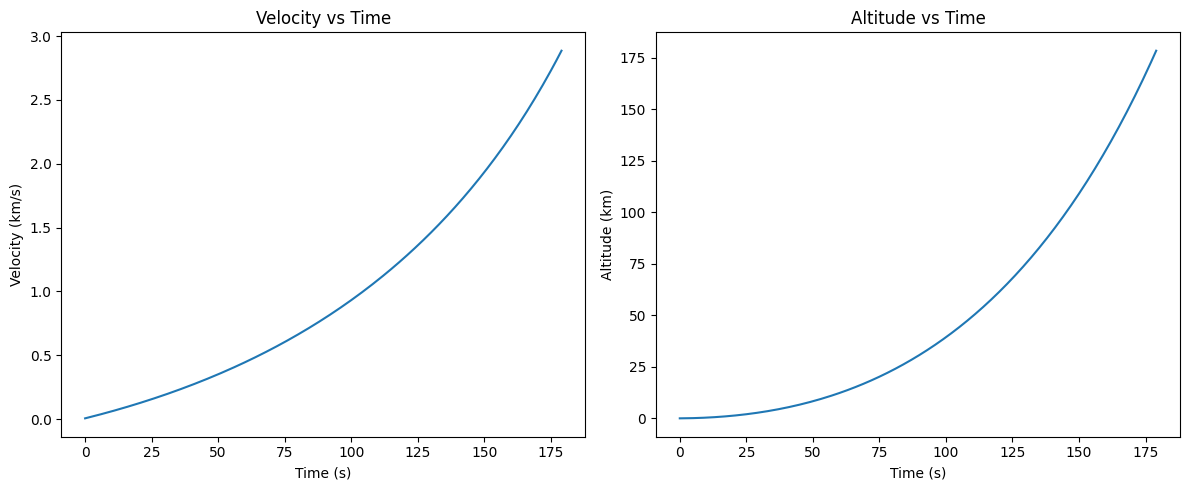

In [1]:
# LEOP Simulation: Launch to Low Earth Orbit
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11       # gravitational constant (m^3 kg^-1 s^-2)
M_earth = 5.972e24    # kg
R_earth = 6371e3      # m

# Satellite + rocket parameters
m0 = 7507759     # Initial mass (kg)
mf = 150000     # Final mass after fuel burn (kg)
ve = 3500       # Exhaust velocity (m/s)
thrust = 7.5e6  # Constant thrust (N)
burn_time = 180  # seconds

# Compute delta-v
delta_v = ve * np.log(m0 / mf)
print(f"Delta-v: {delta_v:.2f} m/s")

# Simplified ascent simulation (1D vertical motion)
dt = 1  # timestep (s)
time = np.arange(0, burn_time, dt)
velocity = []
altitude = []
mass = m0
current_v = 0
current_h = 0

for t in time:
    acc = thrust / mass - G * M_earth / (R_earth + current_h)**2
    current_v += acc * dt
    current_h += current_v * dt
    mass -= (m0 - mf) / burn_time * dt  # linear fuel usage
    velocity.append(current_v)
    altitude.append(current_h)

# Final orbital parameters
r_final = R_earth + altitude[-1]
v_orbit = np.sqrt(G * M_earth / r_final)
print(f"Final Altitude: {altitude[-1]/1000:.2f} km")
print(f"Required Orbital Velocity: {v_orbit:.2f} m/s")
print(f"Actual Achieved Velocity: {velocity[-1]:.2f} m/s")

# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time, [v/1000 for v in velocity])
plt.title("Velocity vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (km/s)")

plt.subplot(1, 2, 2)
plt.plot(time, [h/1000 for h in altitude])
plt.title("Altitude vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Altitude (km)")

plt.tight_layout()
plt.show()
